In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
books = pd.read_csv('/opt/ml/input/code/data/books.csv')

books['category']는 대괄호 안에 들어있으므로, 이를 밖으로 빼주어야 한다. <br>
또한 
re.sub('[\W_]+',' ' == ```[^a-zA-Z0-9_]```
를 통해 특수문자를 제거한다.

In [6]:
import re
books.loc[books[books['category'].notnull()].index, 'category'] = books[books['category'].notnull()]['category'].apply(lambda x: re.sub('[\W_]+',' ',x).strip())

카테고리가 `Fiction`과 `fiction` 같이 대소문자 때문에 다른 카테고리로 분류된 경우가 있다. 따라서 모두 소문자로 변경한다.

In [7]:
books['category'] = books['category'].str.lower()

대분류를 위해 `category_high`를 만든다.

In [8]:
books['category_high'] = books['category'].copy()

대분류 카테고리의 DataFrame을 생성한다. 데이터프레임을 통해 others 항목(책이 5권 미만인 경우)을 쉽게 구분할 수 있다. 

In [9]:
category_high_df = pd.DataFrame(books['category_high'].value_counts()).reset_index()
category_high_df.columns = ['category', 'count']

others, biograpy, history 등의 카테고리의 대분류를 category_high에 저장한다.

In [10]:
other_list = category_high_df[category_high_df['count'] < 5]['category']
books.loc[books[books['category_high'].isin(other_list)].index, 'category_high'] = 'others'

books.loc[books[books['category']=='biography'].index, 'category_high'] = 'biography autobiography'
books.loc[books[books['category']=='autobiography'].index,'category_high'] = 'biography autobiography'

categories = ['history', 'fiction', 'garden','crafts','physics','adventure','music','fiction','nonfiction','science','science fiction','social','homicide',
 'sociology','disease','religion','christian','philosophy','psycholog','mathemat','agricult','environmental',
 'business','poetry','drama','literary','travel','motion picture','children','cook','literature','electronic',
 'humor','animal','bird','photograph','computer','house','ecology','family','architect','camp','criminal','language','india']

for category in categories:
    books.loc[books[books['category'].str.contains(category,na=False)].index,'category_high'] = category

## 시각화

/tmp/ipykernel_9680/84445793.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')


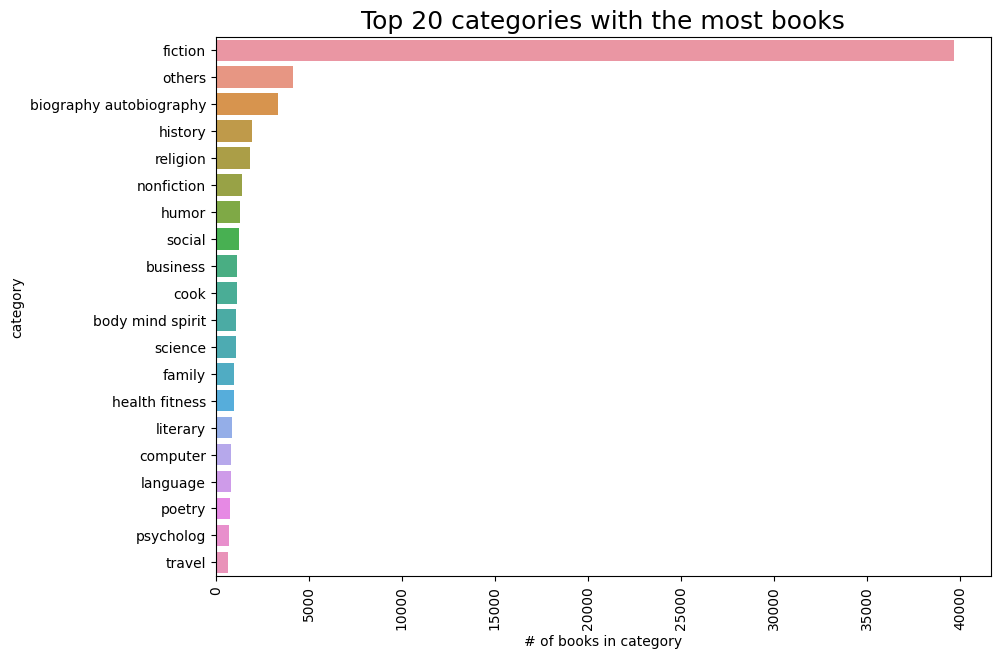

In [11]:
category_high_df = pd.DataFrame(books['category_high'].value_counts()).reset_index()
category_high_df.columns = ['category', 'count']

b = category_high_df.sort_values(by=['count'], ascending=False)
b = b.head(20)

plt.figure(figsize=(10, 7))
ax = sns.barplot(x='count', y='category', data=b)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.xlabel("# of books in category")
plt.ylabel("category")
plt.title("Top 20 categories with the most books", size=18)

plt.show()